### Professor: Dieval Guizelini
### Estudante: Clístenes Grizafis Bento

# Atividade 01: Desenvolver a função triangular (fuzzy)

screva a função triangular que receberá um parâmetro d indicando o tamanho da vizinha, a função deverá retornar um vetor com 2d+1 graus de pertinência para a vizinhança d. 
Apresente a solução em Python ou em: R, C, Java, Php, Javascript... Mas indique a linguagem.

## Utilizarei função triangular, em Python com um exemplo de gorjetas de restaurante cuja descrição será feira abaixo:

### Antecedentes (entradas)

Serviço: que nota você daria para o serviço, emuma escala de 0 a 10?

- ruim, aceitável, ótimo

Qualidade da comida: quão boa estava a comida, em uma escala de 0 a 10?

- ruim, boa, saborosa

### Consequentes (saídas)

Gorjeta: quanta gorgeta você daria entre 0% e 20%?

- baixa, média, alta

Regras

- Se a qualidade da comida for ruim ou o serviço for ruim então a gorjeta será baixa
- Se o serviço for médio então a gorjeta será média
- Se o serviço for bom e a qualidade da comida for saborosa então a gorjeta será alta

## Instalação e importação das bibliotecas

In [2]:
!pip install scikit-fuzzy > /dev/null 2>&1

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

## Antecedentes e consequentes 

In [4]:
x_comida = np.arange(0,11,1)
x_servico = np.arange(0,11,1)
x_gorjeta = np.arange(0,21,1)

In [5]:
x_comida, x_servico, x_gorjeta

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]))

## Qualidade da comida

In [6]:
y_comida_ruim = fuzz.trimf(x_comida, [0,0,5])
y_comida_boa = fuzz.trimf(x_comida, [0, 5, 10])
y_comida_saborosa = fuzz.trimf(x_comida, [5,10,10])

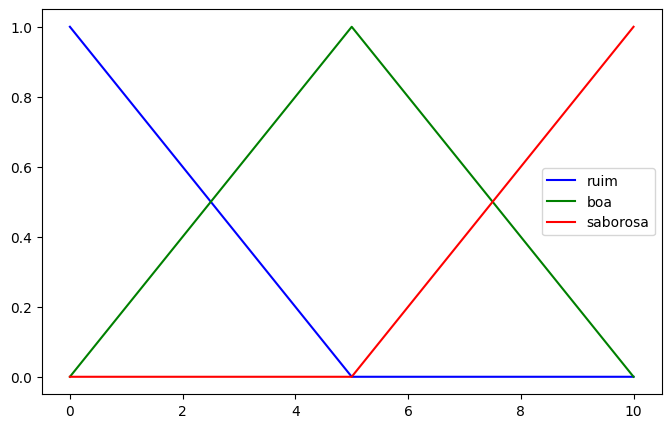

In [7]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x_comida, y_comida_ruim, 'b', label='ruim')
ax.plot(x_comida, y_comida_boa, 'g', label='boa')
ax.plot(x_comida, y_comida_saborosa, 'r', label='saborosa')
ax.legend();

## Qualidade do serviço

In [8]:
y_servico_ruim = fuzz.trimf(x_servico, [0,0,5])
y_servico_aceitavel = fuzz.trimf(x_servico, [0,5,10])
y_servico_otimo = fuzz.trimf(x_servico, [5,10,10])

In [9]:
y_servico_ruim, y_servico_aceitavel, y_servico_otimo

(array([1. , 0.8, 0.6, 0.4, 0.2, 0. , 0. , 0. , 0. , 0. , 0. ]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 0.8, 0.6, 0.4, 0.2, 0. ]),
 array([0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0.4, 0.6, 0.8, 1. ]))

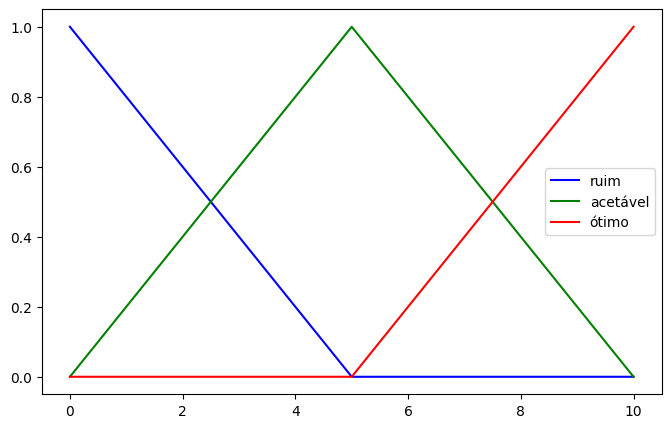

In [10]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x_servico, y_servico_ruim, 'b', label='ruim')
ax.plot(x_servico, y_servico_aceitavel, 'g', label='acetável')
ax.plot(x_servico, y_servico_otimo, 'r', label='ótimo')
ax.legend();

## Gorjeta

In [11]:
y_gorjeta_baixa = fuzz.trimf(x_gorjeta, [0,0,10])
y_gorjeta_media = fuzz.trimf(x_gorjeta, [0,10,20])
y_gorjeta_alta = fuzz.trimf(x_gorjeta, [10,20,20])

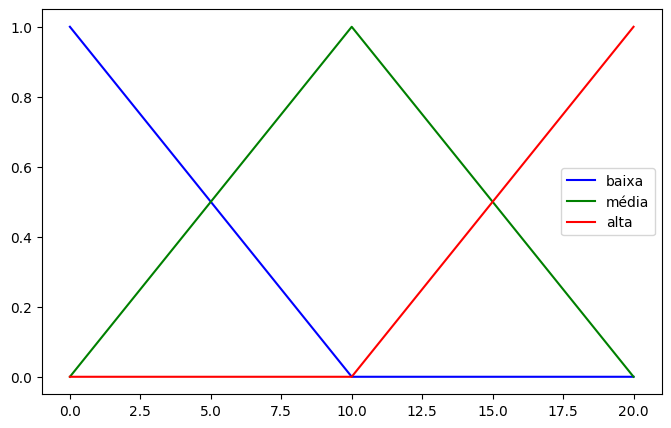

In [12]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x_gorjeta, y_gorjeta_baixa, 'b', label='baixa')
ax.plot(x_gorjeta, y_gorjeta_media, 'g', label='média')
ax.plot(x_gorjeta, y_gorjeta_alta, 'r', label='alta')
ax.legend();

## Entradas (inputs)

In [13]:
comida_nivel_ruim = fuzz.interp_membership(x_comida, y_comida_ruim, 8.0)
comida_nivel_boa = fuzz.interp_membership(x_comida, y_comida_boa, 8.0)
comida_nivel_saborosa = fuzz.interp_membership(x_comida, y_comida_saborosa, 8.0)

In [14]:
 comida_nivel_ruim, comida_nivel_boa, comida_nivel_saborosa

(0.0, 0.4, 0.6)

In [15]:
servico_nivel_ruim = fuzz.interp_membership(x_servico, y_servico_ruim, 6.5)
servico_nivel_aceitavel = fuzz.interp_membership(x_servico, y_servico_aceitavel, 6.5)
servico_nivel_otimo = fuzz.interp_membership(x_servico, y_servico_otimo, 6.5)

In [16]:
servico_nivel_ruim, servico_nivel_aceitavel, servico_nivel_otimo

(0.0, 0.7, 0.30000000000000004)

## Regras

### Regra 1

  - Se a qualidade da comida for ruim ou o serviço for ruim então a gorjeta será baixa

In [19]:
comida_nivel_ruim, servico_nivel_ruim

(0.0, 0.0)

In [20]:
ativacao_regra1 = np.fmax(comida_nivel_ruim, servico_nivel_ruim)
ativacao_regra1

0.0

In [21]:
ativacao_gorjeta_baixa = np.fmin(ativacao_regra1, y_gorjeta_baixa)
ativacao_gorjeta_baixa

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

### Regra 2

  - Se o serviço for aceitável então a gorjeta será média

In [22]:
servico_nivel_aceitavel

0.7

In [23]:
y_gorjeta_media

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 0.9, 0.8,
       0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ])

In [24]:
ativacao_gorjeta_media = np.fmin(servico_nivel_aceitavel, y_gorjeta_media)
ativacao_gorjeta_media

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7,
       0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ])

### Regra 3
  - Se a qualidade da comida for saborosa ou o serviço for bom/ótimo então a gorjeta será alta

In [25]:
servico_nivel_otimo, comida_nivel_saborosa

(0.30000000000000004, 0.6)

In [26]:
ativacao_regra3 =np.fmax(servico_nivel_otimo, comida_nivel_saborosa)
ativacao_regra3

0.6

In [27]:
ativacao_gorjeta_alta = np.fmin(ativacao_regra3, y_gorjeta_alta)
ativacao_gorjeta_alta

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.2,
       0.3, 0.4, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6])

## Gráfico com as intersecções

In [28]:
x_gorjeta

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [29]:
x_gorjeta0 = np.zeros_like(x_gorjeta)
x_gorjeta0

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [30]:
x_gorjeta.shape, x_gorjeta0.shape

((21,), (21,))

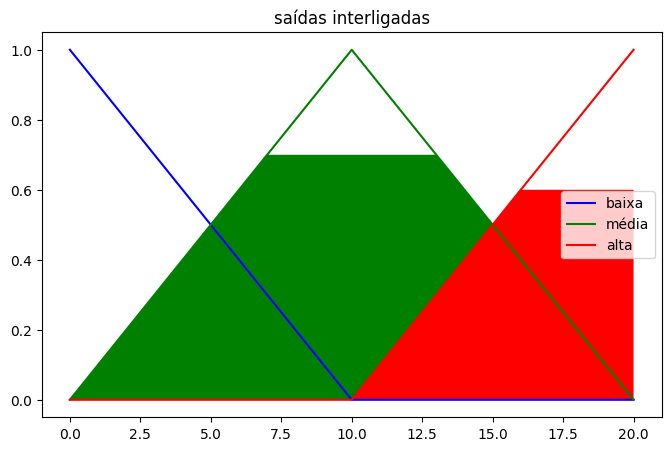

In [31]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x_gorjeta, y_gorjeta_baixa, 'b', label='baixa')
ax.fill_between(x_gorjeta, x_gorjeta0, ativacao_gorjeta_baixa, facecolor='b')
ax.plot(x_gorjeta, y_gorjeta_media, 'g', label='média')
ax.fill_between(x_gorjeta, x_gorjeta0, ativacao_gorjeta_media, facecolor='g')
ax.plot(x_gorjeta, y_gorjeta_alta, 'r', label='alta')
ax.fill_between(x_gorjeta, x_gorjeta0, ativacao_gorjeta_alta, facecolor='r')
ax.set_title('saídas interligadas')
ax.legend();

## Defuzzificação

  - centroid (centroid)
  - bisector (bisector)
  - mean of maximum (mom)
  - mim of maximum (som)
  - max of maximum (lom)

In [32]:
controle = np.fmax(ativacao_gorjeta_baixa, np.fmax(ativacao_gorjeta_media, ativacao_gorjeta_alta))
controle

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7,
       0.7, 0.6, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6])

In [33]:
gorjeta = fuzz.defuzz(x_gorjeta, controle, 'centroid')
#gorjeta = fuzz.defuzz(x_gorjeta, controle, 'bisector')
#gorjeta = fuzz.defuzz(x_gorjeta, controle, 'mom')
#gorjeta = fuzz.defuzz(x_gorjeta, controle, 'som')
#gorjeta = fuzz.defuzz(x_gorjeta, controle, 'lom')
gorjeta

11.287037037037038

In [34]:
gorjeta_ativacao = fuzz.interp_membership(x_gorjeta, controle, gorjeta)

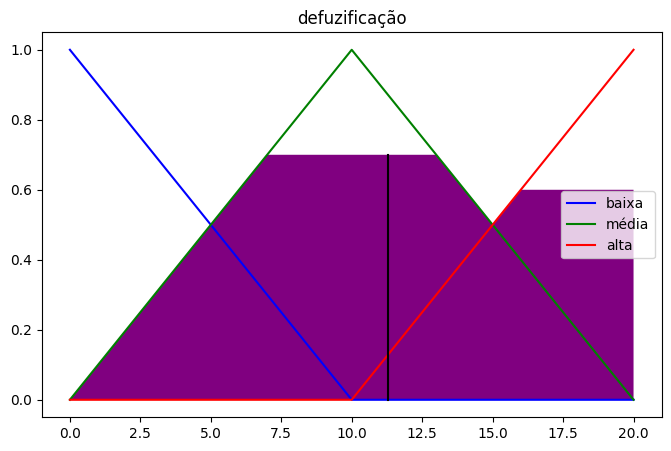

In [35]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x_gorjeta, y_gorjeta_baixa, 'b', label='baixa')
ax.plot(x_gorjeta, y_gorjeta_media, 'g', label='média')
ax.plot(x_gorjeta, y_gorjeta_alta, 'r', label='alta')
ax.fill_between(x_gorjeta, x_gorjeta0, controle, facecolor='purple')
ax.plot([gorjeta, gorjeta], [0, gorjeta_ativacao], 'black')
ax.set_title('defuzificação')
ax.legend();